<a href="https://colab.research.google.com/github/sharonibejih/SCAMP-Assessment-/blob/Updated-notebook/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing some libraries

In [1]:
# Data processing libraries
import numpy as np
import pandas as pd

# Data visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing the dataset

In [0]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')


### Exploratory Data Analysis

In [4]:
!pip install datasist

In [0]:
import datasist as ds

In [6]:
ds.structdata.describe(train_set)

First five data points


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




Random five data points


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
663,664,0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




Last five data points


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q




Shape of  data set: (891, 12)


Size of  data set: 10692


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64




Numerical Features in Data set
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Categorical Features in Data set


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



Statistical Description of Columns


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




Description of Categorical Features


,count,unique,top,freq
Name,891,891,"Givard, Mr. Hans Kristensen",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644




Unique class Count of Categorical features


,Feature,Unique Count
0,Name,891
1,Sex,2
2,Ticket,681
3,Cabin,148
4,Embarked,4




Missing Values in Data


,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,177,19.9
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


> The cell below will check for the uniformity in the data distribution of the training set and test set

There are 891 training rows and 418 test rows.
There are 12 training columns and 11 test columns.
Id field is unique.
Train and test sets IDs are the same.




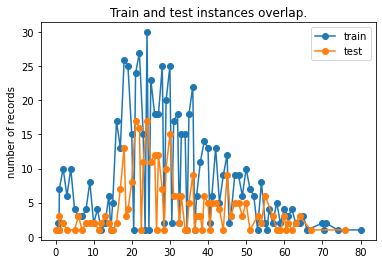

In [7]:
ds.structdata.check_train_test_set(train_set, test_set,'Name', 'Age')

Fig. 1

From the chart we can see that both data sets are distributed in a like manner. The 'Name' and 'Age' were used to represent the categorical and Numeric data respectively. Also as the Name data point has 891 unique inputs, when relating it with the Age distributions, the chart can tell if either the train or test set is more concentrated with some Age interval. However, both datasets seem uniformly distributed.  

>The Datasist library, has a way of automatically locating missing data and filling them with the right values. This is applicable for the Categorical and Numerical data.

In [0]:
training_set = ds.feature_engineering.fill_missing_cats(train_set)
training_set = ds.feature_engineering.fill_missing_num(train_set)

testing_set = ds.feature_engineering.fill_missing_cats(test_set)
testing_set = ds.feature_engineering.fill_missing_num(test_set)

In [9]:
ds.structdata.display_missing(training_set)

,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,0,0.0
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


In [10]:
ds.structdata.display_missing(testing_set)

,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Pclass,0,0.0
2,Name,0,0.0
3,Sex,0,0.0
4,Age,0,0.0
5,SibSp,0,0.0
6,Parch,0,0.0
7,Ticket,0,0.0
8,Fare,0,0.0
9,Cabin,327,78.2


In [0]:
training_set = ds.feature_engineering.fill_missing_cats(training_set)
training_set = ds.feature_engineering.fill_missing_num(training_set)

testing_set = ds.feature_engineering.fill_missing_cats(testing_set)
testing_set = ds.feature_engineering.fill_missing_num(testing_set)

In [12]:
ds.structdata.display_missing(training_set)

,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Survived,0,0.0
2,Pclass,0,0.0
3,Name,0,0.0
4,Sex,0,0.0
5,Age,0,0.0
6,SibSp,0,0.0
7,Parch,0,0.0
8,Ticket,0,0.0
9,Fare,0,0.0


In [13]:
ds.structdata.display_missing(testing_set)

,features,missing_counts,missing_percent
0,PassengerId,0,0.0
1,Pclass,0,0.0
2,Name,0,0.0
3,Sex,0,0.0
4,Age,0,0.0
5,SibSp,0,0.0
6,Parch,0,0.0
7,Ticket,0,0.0
8,Fare,0,0.0
9,Cabin,0,0.0


From the above table, it can be shown that all missing values have been filled.

>### Data Processing and Visualizations

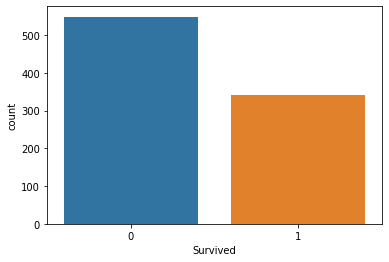

In [14]:
sns.countplot(training_set['Survived'])

Fig. 2

In [15]:
training_set['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

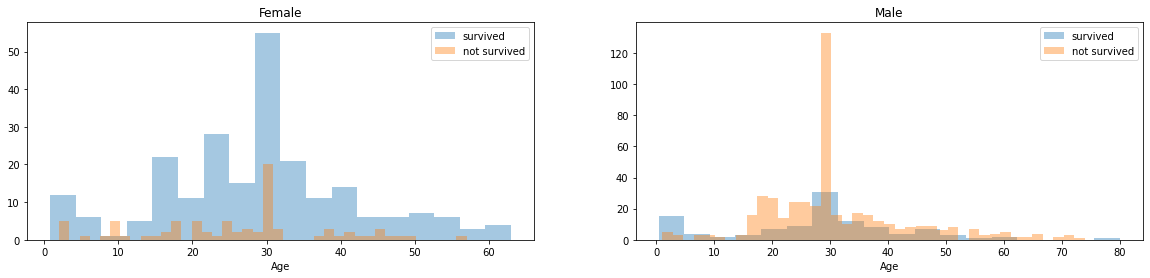

In [16]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
women = training_set[training_set['Sex']=='female']
men = training_set[training_set['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Fig. 3

>The total ratio of survivals to lives lost is roughly about 1 : 2. In Fig 3, it illustrated that within the percentage of the survived, women survived more.

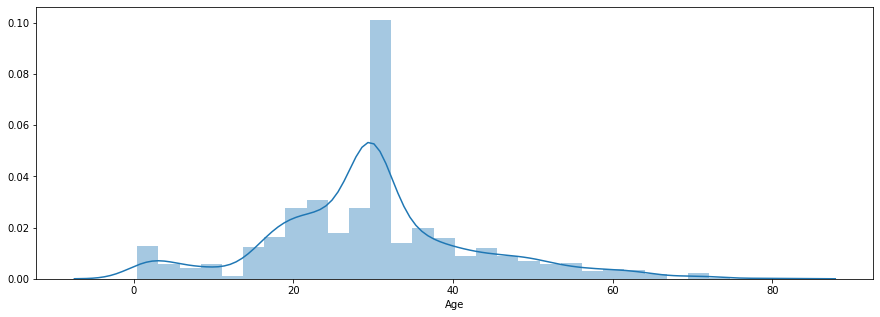

In [17]:
plt.figure(figsize = (15, 5))
sns.distplot(training_set['Age'])

Fig. 4

Most of the people on the Titanic ship ranged from 20 to 40 years. In the cell below, the Ages will be grouped

In [0]:
data = [training_set, testing_set]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[dataset['Age'] > 60, 'Age'] = 6

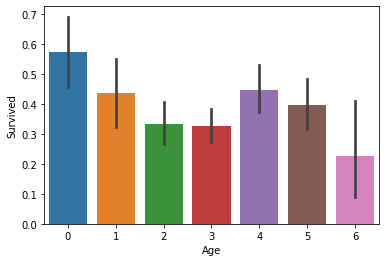

In [19]:
sns.barplot(x = 'Age', y = 'Survived', data = training_set)

# df_ = training_set.groupby('Sex').sum()
# #df.reset_index(inplace=True)
# sns.barplot(x='Age', y='Survived', data=df_)

Fig. 5

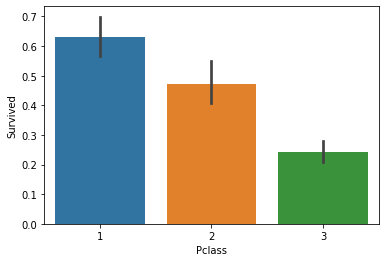

In [20]:
sns.barplot(x = 'Pclass', y = 'Survived', data = training_set)

Fig. 6

According to the charts in Fig. 3 to 6, we can make the following deductions:

 1) Females survived more than the males.
 
 2) People who were within the age bracket of 0 - 11, survived most, while those older than 60, and the younger youth           between 18 - 30, died most. 
    However **Fig. 2** elaborates and shows that women within the latter age group had a very high rate of survival       compared to their male counterparts.
 
 3) Also, people of the First class status (Pclass 1), had higher chances of surviving compared to other classes.

### Data Wrangling

In [0]:
data = [training_set, testing_set]
titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

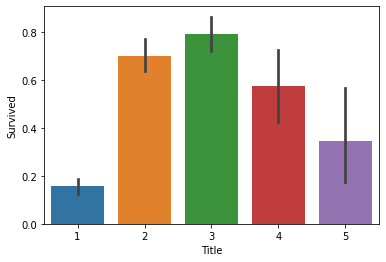

In [22]:
sns.barplot(x = 'Title', y = 'Survived', data = training_set)

Fig. 7

In [0]:
sex = {'male': 0, 'female': 1}
data = [training_set, testing_set]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(sex)

In [0]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data = [training_set, testing_set]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [25]:
training_set['Cabin'].value_counts() 

B96 B98        691
C23 C25 C27      4
G6               4
F33              3
F2               3
              ... 
D30              1
E10              1
B50              1
A23              1
C99              1
Name: Cabin, Length: 147, dtype: int64

The Cabin data set could have been processed to become numerical but the above output shows how unbalanced the missing data was filled earlier. Hence to aviod biaises, it will not be used in running the model.

>### Dropping irrelevant features

In [0]:
to_drop = ['PassengerId', 'Name', 'Ticket'] #'SibSp', 'Parch', 'Ticket']

train = training_set.drop(to_drop, axis = 1, inplace = True)
test = testing_set.drop(to_drop, axis = 1, inplace = True)

In [27]:
training_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,2,1,0,7.25,B96 B98,0,1
1,1,1,1,4,1,0,71.2833,C85,1,3
2,1,3,1,3,0,0,7.925,B96 B98,0,2
3,1,1,1,4,1,0,53.1,C123,0,3
4,0,3,0,4,0,0,8.05,B96 B98,0,1


In [28]:
testing_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,0,4,0,0,7.8292,B57 B59 B63 B66,2,1
1,3,1,5,1,0,7,B57 B59 B63 B66,0,3
2,2,0,6,0,0,9.6875,B57 B59 B63 B66,2,1
3,3,0,3,0,0,8.6625,B57 B59 B63 B66,0,1
4,3,1,2,1,1,12.2875,B57 B59 B63 B66,0,3


### Standardizing the data and Building a model

In [0]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier

In [0]:
X_train = training_set.drop(['Survived', 'Cabin'], axis=1)
Y_train = training_set['Survived']
Y_train = Y_train.astype('int')
X_test  = testing_set.drop('Cabin', axis=1)

Scaling was used to place all the values of the data points within a similar range. Previewing the data, we can tell that the 'Fare' column was out of proportion. Therefore after preprocessing, all values will be standardized.

In [0]:
from sklearn import preprocessing

X_Train = preprocessing.scale(X_train)
X_Test = preprocessing.scale(X_test)



Now, the dataset is fit for modelling. Different algorithms will be used to create a good model, out of which the best will be further used to get our final prediction.

In [66]:
# 1)
xgbclassifier = XGBClassifier(n_estimators = 100, oob_score = True)
xgbclassifier.fit(X_Train, Y_train)
Y_prediction = xgbclassifier.predict(X_Test)

xgbclassifier.score(X_Train, Y_train)

acc_xgbclassifier = round(xgbclassifier.score(X_Train, Y_train) * 100, 2)
print("Prediction Accuracy: ", round(acc_xgbclassifier,2,), "%")


Prediction Accuracy:  88.1 %


In [33]:
# 2)
rfclassifier = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfclassifier.fit(X_Train, Y_train)
Y_prediction = rfclassifier.predict(X_Test)

rfclassifier.score(X_Train, Y_train)

acc_rfclassifier = round(rfclassifier.score(X_Train, Y_train) * 100, 2)
print("Prediction Accuracy: ", round(acc_rfclassifier,2,), "%")

Prediction Accuracy:  95.06 %


In [34]:
# 3)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_Train, Y_train)

Y_pred = decision_tree.predict(X_Test)

acc_decision_tree = round(decision_tree.score(X_Train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

95.06 %


>Out of the three models that were trained, the RandomForestClassifier and the DecisionTreeClassifier, performed best in predicting Y. The next two cells will evaluate their performances using 'Cross validation (cv)' technique. The cv will divide the dataset into 10 parts (or preferrably folds) as was chosen. This will run the model through and tell the mean value of the accuracy. The purpose of this is to minimize biases while training the model. Also the Standard deviation tells how far the model was from the actual Y values (i.e Y_train).


In [35]:
# Random Forest Classifier

from sklearn.model_selection import cross_val_score
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 302)
scores = cross_val_score(rf_classifier, X_Train, Y_train, cv = 10,scoring = 'accuracy')


print('Scores:', scores, '\n')
print('Mean:', scores.mean(), '\n')
print('Standard Deviation:', scores.std())

Scores: [0.81111111 0.83146067 0.75280899 0.80898876 0.88764045 0.86516854
 0.78651685 0.75280899 0.83146067 0.87640449] 

Mean: 0.8204369538077403 

Standard Deviation: 0.045175572896015266


In [37]:
# Decision Tree Classifier

from sklearn.model_selection import cross_val_score
decision_tree = DecisionTreeClassifier(random_state = 303)
scores = cross_val_score(decision_tree, X_Train, Y_train, cv = 10,scoring = 'accuracy')


print('Scores:', scores, '\n')
print('Mean:', scores.mean(), '\n')
print('Standard Deviation:', scores.std())

Scores: [0.78888889 0.83146067 0.71910112 0.82022472 0.85393258 0.7752809
 0.82022472 0.78651685 0.78651685 0.86516854] 

Mean: 0.8047315855181024 

Standard Deviation: 0.040475109761839996


The cv method showed further that RandomForestClassifier has a higher mean accuracy than the DecisionTreeClassifier.

The cell below will run an **out of bag samples** accuracy. This is usually the best method for estimating random-forest classifiers performance. 

In [69]:
print("oob score:", round(rfclassifier.oob_score_, 4)*100, "%")

oob score: 80.81 %


From the two preceeding cells, we can see how the Random Forest accuracy dropped from 95% to ~81%. We might want to know further the details of the model's predictions. This is done using the confusion_matrix.

In [50]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rfclassifier, X_Train, Y_train, cv=10)
confusion_matrix(Y_train, predictions)

array([[475,  74],
       [ 97, 245]])

The confusion_matrix gives a detailed summary of the model predictions. So here we have that **475** of the **non-survived** were **correctly classified** while **74** of them were **not**.
Also, **97 passengers** were **wrongly classified as survived** while **245 were correctly classified**.


After using all accuracy matrices, the model still proved to be a good fit.

In [0]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfclassifier.feature_importances_,3)})
importances = importances.sort_values('importance',ascending = False).set_index('feature')

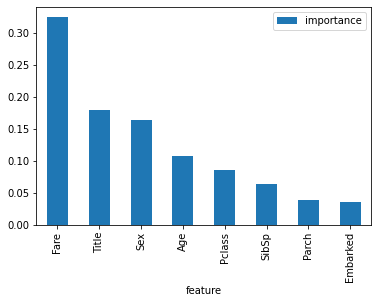

In [52]:
importances.plot.bar()

Fig. 7

Fig. 7 above is used to illustrate the important features in a descending order. Visually, Fare is a very strong determinant, followed by the Title the passengers bore, their Sex and Ages. 

In [63]:
submission = pd.read_csv('gender_submission.csv')
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [0]:
submission['Survived'] = Y_prediction

In [0]:
submission.to_csv('Final_submission.csv', index = False)

In [65]:
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
